## PICKING THE DATA 

In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/SUNIL REDDY/Desktop/DATASETS/all/all.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [2]:
data.shape

(13580, 21)

In [3]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [4]:
import seaborn as sns
sns.heatmap(data.isnull())

## Identifying Numerical Data  

In [5]:
import numpy as np
data_num=data.select_dtypes(include=[np.number])
data_num.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [6]:
data_num.shape

(13580, 13)

In [7]:
data_num.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

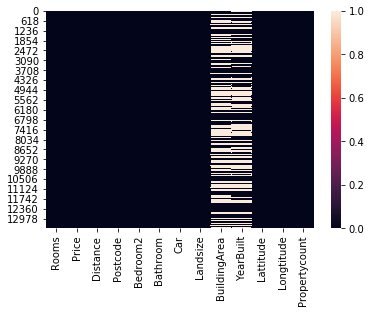

In [8]:
sns.heatmap(data_num.isnull())

## Filling null spaces in numeric data. 

In [9]:
data_num.Car.fillna(data_num.Car.mean(),inplace=True)
data_num.BuildingArea.fillna(data_num.BuildingArea.mean(),inplace=True)
data_num.YearBuilt.fillna(data_num.YearBuilt.mean(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
data_num.isnull().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

## Identifying text data


In [11]:
data_cat=data.select_dtypes(include=[np.object])
data_cat.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra,Northern Metropolitan


In [12]:
data_cat.isnull().sum()

Suburb            0
Address           0
Type              0
Method            0
SellerG           0
Date              0
CouncilArea    1369
Regionname        0
dtype: int64

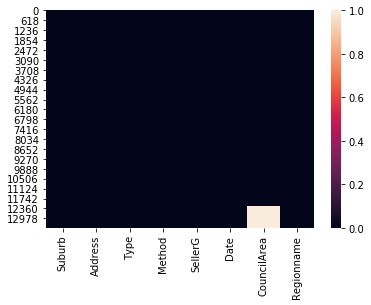

In [13]:
sns.heatmap(data_cat.isnull())

## Filling null spaces in text data.  

In [14]:
data_cat.CouncilArea.fillna(data_cat.CouncilArea.value_counts().idxmax(),inplace=True)
data_cat.isnull().sum()

Suburb         0
Address        0
Type           0
Method         0
SellerG        0
Date           0
CouncilArea    0
Regionname     0
dtype: int64

## Label encoding text data into numeric data. 

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
data_cat=data_cat.apply(le.fit_transform)
data_final=pd.concat([data_num,data_cat],axis=1)
data_final.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,...,144.9984,4019.0,0,12794,0,1,23,45,31,2
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,...,144.9934,4019.0,0,5943,0,1,23,47,31,2
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,...,144.9944,4019.0,0,9814,0,3,23,48,31,2
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,...,144.9969,4019.0,0,9004,0,0,23,48,31,2
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,...,144.9941,4019.0,0,10589,0,4,155,49,31,2


In [17]:
print(data.shape)
print(data_num.shape)
print(data_cat.shape)
print(data_final.shape)

(13580, 21)
(13580, 13)
(13580, 8)
(13580, 21)


# APPLYING REGRESSION ALGORITHMS:

## 1.Linear Regression 

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
x1=data_final[['BuildingArea']]
x1.head()

,BuildingArea
0,151.96765
1,79.00000
2,150.00000
3,151.96765
4,142.00000


In [20]:
y1=data_final['Price']
y1.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

##  LR. Fitting Score 

In [21]:
fit=lr.fit(x1,y1)
fit.score(x1,y1)

0.004840005900684008

In [22]:
a1=lr.fit(x1,y1)

In [23]:
a2=lr.predict(x1)
a2

array([1075684.07945508, 1067405.11637747, 1075460.82845555, ...,
       1075684.07945508, 1076255.05359001, 1071149.32058277])

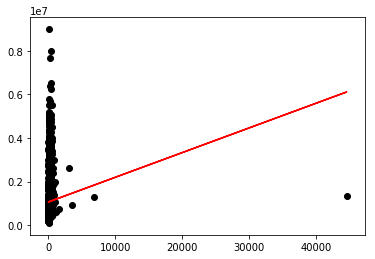

In [24]:
import matplotlib.pyplot as plt
plt.plot(x1,lr.predict(x1),color='r')
plt.scatter(x1,y1,color='k')

# 2.Multiple Linear Regression

In [25]:
x2=data_final[['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount','Method','SellerG']]
x2.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Method,SellerG
0,2,2.5,2.0,1.0,1.0,202.0,4019.0,1,23
1,2,2.5,2.0,1.0,0.0,156.0,4019.0,1,23
2,3,2.5,3.0,2.0,0.0,134.0,4019.0,3,23
3,3,2.5,3.0,2.0,1.0,94.0,4019.0,0,23
4,4,2.5,3.0,1.0,2.0,120.0,4019.0,4,155


In [26]:
y2=data_final['Price']
y2.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [27]:
b1=lr.fit(x2,y2)

In [28]:
b2=lr.predict(x2)
b2

array([ 986892.55915215,  934403.83071878, 1395520.58375191, ...,
       1434220.09125907, 1572291.42855207, 1319779.116414  ])

## Multiple LR. Fitting Score  

In [2]:
fit=lr.fit(x2,y2)
fit.score(x2,y2)

NameError: name 'lr' is not defined

In [3]:
import matplotlib.pyplot as plt
plt.plot(x2,lr.predict(x2),color='r')
plt.scatter(x2,y2)

NameError: name 'x2' is not defined

# APPLYING CLASSIFICATION ALGORITHMS

## 3.Logistic Regression

In [101]:
x3=data_final[['BuildingArea','Car']]
x3.head()

,BuildingArea,Car
0,151.96765,1.0
1,79.00000,0.0
2,150.00000,0.0
3,151.96765,1.0
4,142.00000,2.0


In [102]:
y3=data_final['Price']
y3.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)

In [109]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

## Logreg. Fitting Score  

In [110]:
fit=logreg.fit(x3,y3)
fit.score(x3,y3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.012371134020618556

In [111]:
c1=logreg.fit(x3_train,y3_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [112]:
c2=c1.predict(x3_test)
c2

array([800000., 500000., 600000., ..., 650000., 800000., 500000.])

## Logreg. Accuracy Score

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y3_test,c2)

0.00892458723784025

# 4.KNN Algorithm

In [31]:
x4=data_final[['Longtitude','Propertycount','Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname']]
x4.head()

,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,144.9984,4019.0,0,12794,0,1,23,45,31,2
1,144.9934,4019.0,0,5943,0,1,23,47,31,2
2,144.9944,4019.0,0,9814,0,3,23,48,31,2
3,144.9969,4019.0,0,9004,0,0,23,48,31,2
4,144.9941,4019.0,0,10589,0,4,155,49,31,2


In [32]:
y4=data_final['Price']
y4.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.33, random_state=42)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [36]:
d1=knn.fit(x4,y4)

In [37]:
d2=knn.predict(x4_test)
d2

array([1330000.,  401000.,  365000., ...,  920000.,  961000.,  535000.])

## KNN Fitting Score

In [100]:
fit=knn.fit(x4_train,y4_train)
fit.score(x4_train,y4_train)

0.20674873598593096

## KNN Accuracy Score  

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y4_test,d2)

0.20526550647032574

# 5.Support Vector Machine 

In [42]:
x5=data_final.iloc[:,[0,1,2,3,5]].values
x5

array([[2.000e+00, 1.480e+06, 2.500e+00, 3.067e+03, 1.000e+00],
       [2.000e+00, 1.035e+06, 2.500e+00, 3.067e+03, 1.000e+00],
       [3.000e+00, 1.465e+06, 2.500e+00, 3.067e+03, 2.000e+00],
       ...,
       [3.000e+00, 1.170e+06, 6.800e+00, 3.016e+03, 2.000e+00],
       [4.000e+00, 2.500e+06, 6.800e+00, 3.016e+03, 1.000e+00],
       [4.000e+00, 1.285e+06, 6.300e+00, 3.013e+03, 1.000e+00]])

In [43]:
y5=data_final.iloc[:,[4]].values
y5

array([[2.],
       [2.],
       [3.],
       ...,
       [3.],
       [4.],
       [4.]])

In [44]:
from sklearn.model_selection import train_test_split
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.33, random_state=42)

In [45]:
from sklearn.svm import LinearSVC
lsvm=LinearSVC()

## SVM Fitting Score 

In [51]:
e1=lsvm.fit(x5_train,y5_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
e2=svm=lsvm.predict(x5_test)
e2

array([7., 7., 7., ..., 7., 7., 7.])

## SVM Fitting Score

In [99]:
fit=lsvm.fit(x5_train,y5_train)
fit.score(x5_train,y5_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.020114310837546712

## SVM Accuray score

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y5_test,e2)

0.04127621597501115

# 6.Decision Tree 

In [54]:
x6=data_final.iloc[:,[0,1,2,15,16,17,18,19,20]].values
x6

array([[2.000e+00, 1.480e+06, 2.500e+00, ..., 4.500e+01, 3.100e+01,
        2.000e+00],
       [2.000e+00, 1.035e+06, 2.500e+00, ..., 4.700e+01, 3.100e+01,
        2.000e+00],
       [3.000e+00, 1.465e+06, 2.500e+00, ..., 4.800e+01, 3.100e+01,
        2.000e+00],
       ...,
       [3.000e+00, 1.170e+06, 6.800e+00, ..., 3.300e+01, 2.300e+01,
        6.000e+00],
       [4.000e+00, 2.500e+06, 6.800e+00, ..., 3.300e+01, 2.300e+01,
        6.000e+00],
       [4.000e+00, 1.285e+06, 6.300e+00, ..., 3.300e+01, 2.300e+01,
        6.000e+00]])

In [55]:
y6=data_final.iloc[:,[4]].values
y6

array([[2.],
       [2.],
       [3.],
       ...,
       [3.],
       [4.],
       [4.]])

In [56]:
from sklearn.model_selection import train_test_split
x6_train,x6_test,y6_train,y6_test=train_test_split(x6,y6,test_size=0.33,random_state=None)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [63]:
f1=dt.fit(x6_train,y6_train)

In [64]:
f2=dt.predict(x6_test)
f2

array([4., 3., 3., ..., 2., 2., 4.])

## DT Fitting Score 

In [97]:
fit=dt.fit(x6_train,y6_train)
fit.score(x6_train,y6_train)

1.0

## DT accuracy_score 

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y6_test,f2)

0.8978134761267291

# 7.Random Forest 

In [72]:
x7=data_final.iloc[:,[0,1,2,3,5,7,9,11,12,14,15,17,18,19,20]].values
x7

array([[2.000e+00, 1.480e+06, 2.500e+00, ..., 4.500e+01, 3.100e+01,
        2.000e+00],
       [2.000e+00, 1.035e+06, 2.500e+00, ..., 4.700e+01, 3.100e+01,
        2.000e+00],
       [3.000e+00, 1.465e+06, 2.500e+00, ..., 4.800e+01, 3.100e+01,
        2.000e+00],
       ...,
       [3.000e+00, 1.170e+06, 6.800e+00, ..., 3.300e+01, 2.300e+01,
        6.000e+00],
       [4.000e+00, 2.500e+06, 6.800e+00, ..., 3.300e+01, 2.300e+01,
        6.000e+00],
       [4.000e+00, 1.285e+06, 6.300e+00, ..., 3.300e+01, 2.300e+01,
        6.000e+00]])

In [73]:
y7=data_final.iloc[:,[4]].values
y7

array([[2.],
       [2.],
       [3.],
       ...,
       [3.],
       [4.],
       [4.]])

In [76]:
from sklearn.model_selection import train_test_split
x7_train,x7_test,y7_train,y7_test=train_test_split(x7,y7,test_size=0.33,random_state=None)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [82]:
g1=rf.fit(x7_train,y7_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [83]:
g2=rf.predict(x7_test)

## RF Fitting Score

In [98]:
fit=rf.fit(x7_train,y7_train)
fit.score(x7_train,y7_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.9948340294570235

## RF accuracy_score

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y7_test,g2)

0.9315037929495761

# 8.Naive Bayes

In [86]:
x8=data_final.iloc[:,[0,1,2,5,7,9,17,18,20]].values
x8

array([[2.000e+00, 1.480e+06, 2.500e+00, ..., 2.300e+01, 4.500e+01,
        2.000e+00],
       [2.000e+00, 1.035e+06, 2.500e+00, ..., 2.300e+01, 4.700e+01,
        2.000e+00],
       [3.000e+00, 1.465e+06, 2.500e+00, ..., 2.300e+01, 4.800e+01,
        2.000e+00],
       ...,
       [3.000e+00, 1.170e+06, 6.800e+00, ..., 1.940e+02, 3.300e+01,
        6.000e+00],
       [4.000e+00, 2.500e+06, 6.800e+00, ..., 2.220e+02, 3.300e+01,
        6.000e+00],
       [4.000e+00, 1.285e+06, 6.300e+00, ..., 2.390e+02, 3.300e+01,
        6.000e+00]])

In [87]:
y8=data_final.iloc[:,[4]].values
y8

array([[2.],
       [2.],
       [3.],
       ...,
       [3.],
       [4.],
       [4.]])

In [88]:
from sklearn.model_selection import train_test_split
x8_train,x8_test,y8_train,y8_test=train_test_split(x8,y8,test_size=0.33,random_state=None)

In [89]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()

In [90]:
h1=mn.fit(x8_train,y8_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
h2=mn.predict(x8_test)
h2

array([1., 0., 1., ..., 6., 2., 4.])

## Naive Bayes Fitting Score

In [94]:
fit=mn.fit(x8_train,y8_train)
fit.score(x8_train,y8_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.17850076939986811

## Naive Bayes accuracy_score

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y8_test,h2)

0.18406961178045517